In [246]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [247]:
dataframe = pd.read_csv('./credit.csv')

In [248]:
dataframe.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,result
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,good
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,bad
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,good
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,good
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,bad


In [249]:
dataframe.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.708000,3271.258000,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.546000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,1.037000
std,1.257638,12.058814,1.08312,2.644945,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856
min,1.000000,4.000000,0.00000,0.000000,250.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.500000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.500000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.250000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,9.000000,18424.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [250]:
print(dataframe.groupby('result').size())

result
bad     300
good    700
dtype: int64


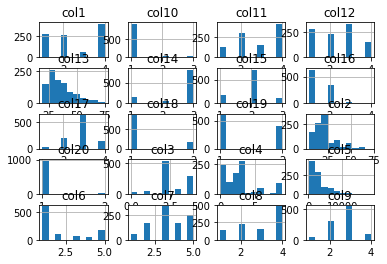

In [251]:
dataframe.drop(['result'],1).hist()
plt.show()

In [252]:
df.head()

,checking,duration,history,purpose,amount,savings,employed,installp,marital,coapp,...,property,age,other,housing,existcr,job,depends,telephon,foreign,good_bad
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,good
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,bad
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,good
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,good
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,bad


In [253]:
X = dataframe.drop(['result'],axis = 1)
y = dataframe['result']
X

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,1,6,4,3,1169,5,5,4,3,1,4,1,67,3,2,2,3,1,2,1
1,2,48,2,3,5951,1,3,2,2,1,2,1,22,3,2,1,3,1,1,1
2,4,12,4,6,2096,1,4,2,3,1,3,1,49,3,2,1,2,2,1,1
3,1,42,2,2,7882,1,4,2,3,3,4,2,45,3,3,1,3,2,1,1
4,1,24,3,0,4870,1,3,3,3,1,4,4,53,3,3,2,3,2,1,1
5,4,36,2,6,9055,5,3,2,3,1,4,4,35,3,3,1,2,2,2,1
6,4,24,2,2,2835,3,5,3,3,1,4,2,53,3,2,1,3,1,1,1
7,2,36,2,1,6948,1,3,2,3,1,2,3,35,3,1,1,4,1,2,1
8,4,12,2,3,3059,4,4,2,1,1,4,1,61,3,2,1,2,1,1,1
9,2,30,4,0,5234,1,1,4,4,1,2,3,28,3,2,2,4,1,1,1


In [254]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=27)

In [256]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x_train, y_train)

In [258]:
predictions = clf.predict(x_test)

In [259]:
clf.score(X,y)

0.76